In [ ]:
# preliminary-analysis-2021-comb-building.ipynb
#
# Bryan Daniels
#
# Doing some preliminary analysis on comb-building data from 2019
# for the social tuning grant proposal.
#

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from toolbox import defaultFigure
defaultFigure.setDefaultParams()

In [2]:
import seaborn as sns

# load data

In [3]:
resultsdir = '../Data/210811/bees_lifetimetracking_2018data/exampledata2019/'

In [4]:
# load data calculated per hour
# modified from Data/210811/bees_lifetimetracking_2018data/Data Usage Example-2019data.ipynb
days_to_load = np.arange(0,31) #10)#31)
dfList = [ pd.read_csv('{}2019data_day{}_perhourmetrics.csv'.format(resultsdir,daynum)) for daynum in days_to_load ]
dfHour = pd.concat(dfList)

In [5]:
# load data calculated in 5 minute intervals
days_to_load = np.arange(4,6) 
dfList = [ pd.read_csv('{}2019data_day{}_per5minmetrics.csv.gz'.format(resultsdir,daynum),
                       compression='gzip') for daynum in days_to_load ]
dfMinute = pd.concat(dfList)

In [6]:
dfHour['Time (days)'] = dfHour['Day number'] + dfHour['Hour']/24.
dfMinute['Time (days)'] = dfMinute['Day number'] + dfMinute['timedivision']/(12.*24.)

In [7]:
def printLargestCorrs(corr,thresh):
    """
    Takes pandas correlation dataframe and prints pairs that are above a given threshold
    """
    largeCorrs = np.transpose(np.nonzero(np.array(corr > thresh)))
    for indices in largeCorrs:
        if indices[0] < indices[1]:
            print("{}, {} : {}".format(corr.columns[indices[0]],
                                corr.columns[indices[1]],
                                np.array(corr)[indices[0],indices[1]]))

# evidence of distinct comb-building state

In [43]:
dfHour['Some festoon'] = (dfHour['Festoon'] > 0).astype(int)
dfMinute['Some festoon'] = (dfMinute['Festoon'] > 0).astype(int)

Text(0, 0.5, 'Total Festooning (bee hours?)')

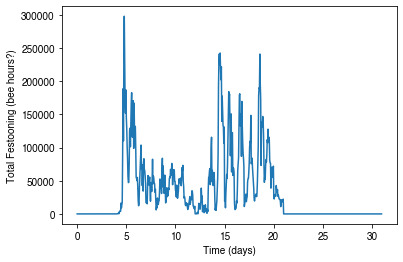

In [7]:
# According to SmiKoePet17, a festoon "often surrounds an area where comb is under construction"
dfHour.groupby('Time (days)').sum()['Festoon'].plot()
plt.ylabel('Total Festooning (bee hours?)')

Text(0, 0.5, 'Number of bees in festoon')

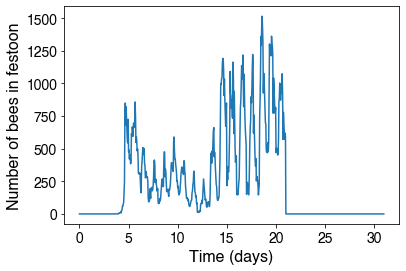

In [44]:
dfHour.groupby('Time (days)').sum()['Some festoon'].plot()
plt.ylabel('Number of bees in festoon')
#plt.yscale('log')

### Focus on start of comb-building during day 4 --- see exponential increase

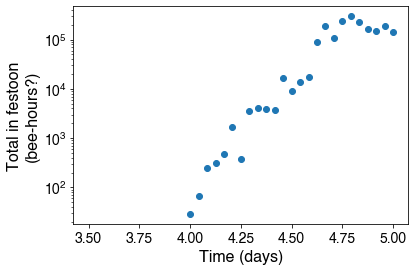

In [568]:
# per hour
dfHour.groupby('Time (days)').sum()['Festoon'].loc[3.5:5].plot(marker='o',ls='')
plt.ylabel('Total in festoon\n(bee-hours?)')
plt.yscale('log')

(3.5, 5.05, 0.5997674437655989, 45957.81295987206)

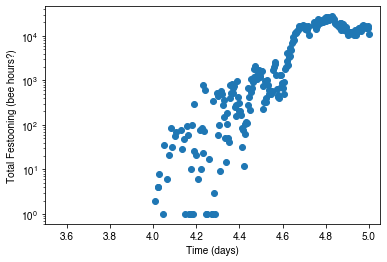

In [10]:
# per 5 minutes
dfMinute.groupby('Time (days)').sum()['Festoon'].loc[3.5:5].plot(marker='o',ls='')
plt.ylabel('Total Festooning (bee hours?)')
plt.yscale('log')
plt.axis(xmin=3.5)

In [270]:
dfCohortDayTrips

Time (days)
0.000000     0.0
0.041667     0.0
0.083333     0.0
0.125000     0.0
0.166667     0.0
            ... 
30.791667    0.0
30.833333    0.0
30.875000    0.0
30.916667    0.0
30.958333    0.0
Name: Some festoon, Length: 744, dtype: float64

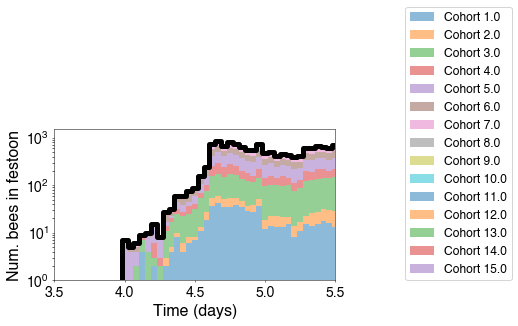

In [275]:
plt.figure(figsize=(6,3))
#dfHour.groupby('Time (days)').sum()['Some festoon'].loc[3.5:5.5].plot(marker='o',ls='',color='cornflowerblue')

# plot by cohort
cohortIDs = dfHour['Cohort ID'].unique() #[7:17]
# initialize tripSum for each day to zero
zeros = 0. * dfHour.groupby('Time (days)').sum()['Some festoon']
tripSum = zeros.copy()
for cohortID in cohortIDs:
    dfCohortDayTrips = dfHour[dfHour['Cohort ID']==cohortID].groupby('Time (days)').sum()['Some festoon']
    # fill with zeros on intervals during which no bees from this cohort were observed
    dfCohortDayTrips = (zeros + dfCohortDayTrips).fillna(0.)
    plt.bar(dfCohortDayTrips.index,dfCohortDayTrips,
            bottom=tripSum,width=dfCohortDayTrips.index[1]-dfCohortDayTrips.index[0],alpha=0.5,
            label='Cohort {}'.format(cohortID))
    tripSum += dfCohortDayTrips

# plot total
g = dfHour.groupby('Time (days)').sum()['Some festoon'].loc[3.5:5.5]
plt.step(g.index,g,where='mid',color='k',lw=5)

# make pretty
plt.yscale('log')
plt.xlabel('Time (days)')
plt.ylabel('Num. bees in festoon');
plt.subplots_adjust(bottom=0.15)
plt.axis(xmin=3.5,xmax=5.5)
plt.legend(loc=(1.25,0.))
defaultFigure.makePretty()
plt.subplots_adjust(left=0.25,right=0.9,bottom=0.2,top=0.9)
#plt.savefig('211021_festoon_bees_vs_time_2019_days_3_4_5.pdf')
#plt.savefig('211103_festoon_bees_vs_time_2019_days_3_4_5.pdf')
plt.savefig('211109_festoon_bees_vs_time_2019_days_3_4_5.pdf')

(3.5, 5.05, 0.7639715313510094, 285.35094706276294)

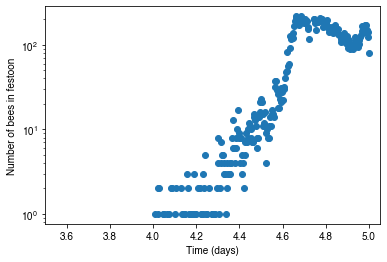

In [12]:
dfMinute.groupby('Time (days)').sum()['Some festoon'].loc[3.5:5].plot(marker='o',ls='')
plt.yscale('log')
plt.ylabel('Number of bees in festoon')
plt.axis(xmin=3.5)

### Festoon behavior seems to suddenly stop on day 21 (maybe by definition?)

<AxesSubplot:xlabel='Time (days)'>

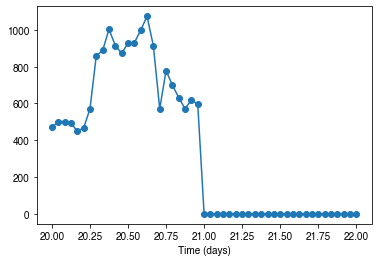

In [13]:
dfHour.groupby('Time (days)').sum()['Some festoon'].loc[20:22].plot(marker='o')

# predictors of comb-building behavior (within same 5 minutes)

In [14]:
dfMinute.columns

Index(['Age', 'Num. observations', 'Honey', 'Brood care', 'Pollen',
       'Dance floor', 'Other', 'Frame 0', 'Frame 1', 'Frame 2', 'Frame 3',
       'Frame 4', 'Frame 5', 'Median speed', 'Speed IQR',
       'Speed 90th quantile', 'Dispersion (avg)', 'Exit distance (median)',
       'Fraction squares visited', 'Day number', 'Festoon', 'Empty comb',
       'Bee unique ID', 'Cohort ID', 'Dispersion-minute avg.', 'timedivision',
       'Time (days)', 'Some festoon'],
      dtype='object')

In [81]:
# define derived quantities
for df in (dfMinute,dfHour):
    df['Some frame 0'] = (df['Frame 0'] > 0).astype(int)
    df['Some frame 3'] = (df['Frame 3'] > 0).astype(int)
    df['Stationary'] = df['Median speed'] == 0
    df['Zero dispersion'] = df['Dispersion (avg)'] == 0
    df['Frame 0 or 3'] = df['Frame 0'] + df['Frame 3']
    df['Some frame 0 or 3'] = (df['Some frame 0'] | df['Some frame 3']).astype(int)

    firstFestoonTimes = df[df['Some festoon']>0].groupby('Bee unique ID').min()['Time (days)']
    df['Has been in festoon'] = np.zeros_like(df['Festoon'])
    for beeIndex in firstFestoonTimes.index:
        time = firstFestoonTimes[beeIndex]
        df.loc[(df['Bee unique ID']==beeIndex) & (df['Time (days)'] >= time),'Has been in festoon'] = 1.

In [170]:
# first try simple correlations
c = dfMinute.corr() - np.diag(np.ones(len(dfMinute.columns)))

In [274]:
# find correlations above a threshold
thresh = 0.4
printLargestCorrs(c,thresh)

Other, Frame 0 : 0.45403724373812565
Other, Frame 3 : 0.4336069712413944
Frame 0, Festoon : 0.4283405739796813
Frame 0, Some festoon : 0.4520462637308291
Frame 0, Some frame 0 : 0.6427199567170143
Frame 3, Festoon : 0.4378421192118771
Frame 3, Some festoon : 0.44134382126552485
Frame 3, Some frame 3 : 0.6274943430086787
Median speed, Speed IQR : 0.640293767531653
Median speed, Speed 90th quantile : 0.6327734434044167
Median speed, Dispersion (avg) : 0.5534740270918043
Median speed, Exit distance (median) : 0.4811725016008786
Speed IQR, Speed 90th quantile : 0.7715219101783567
Day number, Time (days) : 0.8660041760542049
Festoon, Some festoon : 0.46044450383644836
Bee unique ID, Cohort ID : 0.983055293978755
timedivision, Time (days) : 0.500036765704996
Some festoon, Some frame 0 : 0.6663285354892047
Some festoon, Some frame 3 : 0.6668354246940192
Stationary, Zero dispersion : 0.9196816085648372


In [90]:
# spearman correlations
sc = dfMinute.corr('spearman') - np.diag(np.ones(len(dfMinute.columns)))

In [91]:
# find correlations above a threshold
thresh = 0.6
printLargestCorrs(sc,thresh)

Time (days), Day number : 0.8659365879948939
Time (days), Has been in festoon : 0.7060959194838649
Time (days), Total frame 0 in festoon : 0.6063530230960706
Time (days), Total frame 0 some festoon : 0.6098208284698627
Time (days), Total frame 3 some festoon : 0.6402972875480265
Time (days), Total frame 0 or 3 some festoon : 0.62051486058176
Time (days), Other frame 0 some festoon : 0.6031443740018637
Time (days), Other frame 3 some festoon : 0.6386166345893448
Time (days), Other frame 0 or 3 some festoon : 0.6170164770153057
Frame 0, Festoon : 0.6652667265364044
Frame 0, Some festoon : 0.6622307572260085
Frame 0, Some frame 0 : 0.99935725238771
Frame 0, Frame 0 or 3 : 0.7756963162345104
Frame 0, Some frame 0 or 3 : 0.7705980639575553
Frame 0, Frame 0 in festoon : 0.8536431424845334
Frame 0, Frame 0 or 3 in festoon : 0.665511130355782
Frame 0, Frame 0 some festoon : 0.8536970924800925
Frame 0, Frame 0 or 3 some festoon : 0.6655951748059187
Frame 3, Festoon : 0.6650976254282507
Frame 3,

In [162]:
c['Festoon']

Age                         0.075250
Num. observations           0.057367
Honey                      -0.076990
Brood care                 -0.176438
Pollen                     -0.038269
Dance floor                      NaN
Other                       0.374148
Frame 0                     0.428341
Frame 1                    -0.073148
Frame 2                    -0.080181
Frame 3                     0.437842
Frame 4                    -0.067931
Frame 5                    -0.057747
Median speed               -0.052831
Speed IQR                  -0.035422
Speed 90th quantile        -0.047594
Dispersion (avg)           -0.025322
Exit distance (median)      0.161318
Fraction squares visited         NaN
Day number                  0.028468
Festoon                     0.000000
Empty comb                  0.003335
Bee unique ID              -0.071549
Cohort ID                  -0.073862
Dispersion-minute avg.           NaN
timedivision                0.052918
Time (days)                 0.051114
S

In [163]:
sc['Festoon']

Age                         0.119080
Num. observations          -0.086415
Honey                      -0.058211
Brood care                 -0.220466
Pollen                     -0.058376
Dance floor                      NaN
Other                       0.354884
Frame 0                     0.665267
Frame 1                    -0.050691
Frame 2                    -0.095766
Frame 3                     0.665098
Frame 4                    -0.043723
Frame 5                    -0.052984
Median speed                0.080881
Speed IQR                   0.077118
Speed 90th quantile         0.070647
Dispersion (avg)            0.130099
Exit distance (median)      0.237200
Fraction squares visited         NaN
Day number                  0.073993
Festoon                     0.000000
Empty comb                  0.089423
Bee unique ID              -0.114747
Cohort ID                  -0.113377
Dispersion-minute avg.           NaN
timedivision                0.097875
Time (days)                 0.113489
S

In [122]:
# nonzero Frame 0 => nonzero festoon ?
print("Chance of festoon given time in Frame 0    : {}".format(
    np.mean(dfMinute[dfMinute['Frame 0']>0.0]['Some festoon'])))
print("Chance of festoon given no time in Frame 0 : {}".format(
    np.mean(dfMinute[dfMinute['Frame 0']==0.0]['Some festoon'])))
print("Chance of festoon given time in Frame 3    : {}".format(
    np.mean(dfMinute[dfMinute['Frame 3']>0.0]['Some festoon'])))
print("Chance of festoon given no time in Frame 3 : {}".format(
    np.mean(dfMinute[dfMinute['Frame 3']==0.0]['Some festoon'])))

Chance of festoon given time in Frame 0    : 0.7376107606587958
Chance of festoon given no time in Frame 0 : 0.027500570502278075
Chance of festoon given time in Frame 3    : 0.7480573216268039
Chance of festoon given no time in Frame 3 : 0.02808282666415296


### look at conditional frequencies

In [115]:
dfMinute.groupby('Some frame 0').mean()['Some festoon']

Some frame 0
False    0.020861
True     0.737611
Name: Some festoon, dtype: float64

In [120]:
dfMinute.groupby('Some festoon').mean()['Some frame 3']

Some festoon
False    0.012019
True     0.623882
Name: Some frame 3, dtype: float64

In [174]:
dfMinute.groupby('Some festoon').mean()['Zero dispersion']

Some festoon
False    0.243424
True     0.000000
Name: Zero dispersion, dtype: float64

In [176]:
dfMinute.groupby('Zero dispersion').mean()['Some festoon']

Zero dispersion
False    0.070288
True     0.000000
Name: Some festoon, dtype: float64

In [127]:
dfMinute.columns

Index(['Age', 'Num. observations', 'Honey', 'Brood care', 'Pollen',
       'Dance floor', 'Other', 'Frame 0', 'Frame 1', 'Frame 2', 'Frame 3',
       'Frame 4', 'Frame 5', 'Median speed', 'Speed IQR',
       'Speed 90th quantile', 'Dispersion (avg)', 'Exit distance (median)',
       'Fraction squares visited', 'Day number', 'Festoon', 'Empty comb',
       'Bee unique ID', 'Cohort ID', 'Dispersion-minute avg.', 'timedivision',
       'Time (days)', 'Some festoon', 'Some frame 0', 'Some frame 3'],
      dtype='object')

In [130]:
possiblePredictors = ['Age','Honey','Brood care','Pollen','Dance floor',
                      'Other','Frame 0','Frame 1','Frame 2','Frame 3',
                      'Frame 4','Frame 5','Median speed','Speed IQR',
                      'Speed 90th quantile','Dispersion (avg)','Exit distance (median)',
                      'Fraction squares visited','Empty comb','Dispersion-minute avg.']
dfMinute.groupby('Some festoon').mean()[possiblePredictors]

,Age,Honey,Brood care,Pollen,Dance floor,Other,Frame 0,Frame 1,Frame 2,Frame 3,Frame 4,Frame 5,Median speed,Speed IQR,Speed 90th quantile,Dispersion (avg),Exit distance (median),Fraction squares visited,Empty comb,Dispersion-minute avg.
Some festoon,,,,,,,,,,,,,,,,,,,,
False,8.848079,0.246806,0.615765,0.038553,0.0,0.098876,0.005117,0.280300,0.290659,0.004484,0.245671,0.173769,15.396923,22.015154,51.061302,168.708505,2469.615716,NaN,4.502759,0.0
True,12.049911,0.172963,0.280122,0.019622,0.0,0.527293,0.240415,0.176502,0.122286,0.224190,0.156780,0.079828,20.530710,26.470576,58.150981,312.847891,3987.276202,NaN,9.514866,NaN


<AxesSubplot:xlabel='Some festoon', ylabel='Exit distance (median)'>

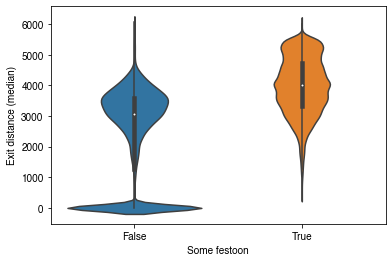

In [131]:
sns.violinplot(y='Exit distance (median)',x='Some festoon',data=dfMinute)

<AxesSubplot:xlabel='Some festoon', ylabel='Dispersion (avg)'>

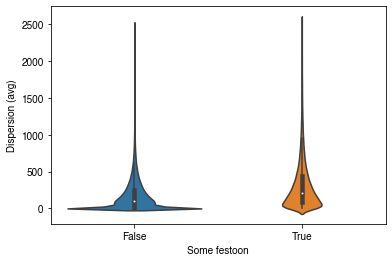

In [134]:
sns.violinplot(y='Dispersion (avg)',x='Some festoon',data=dfMinute)

<AxesSubplot:xlabel='Some festoon', ylabel='Age'>

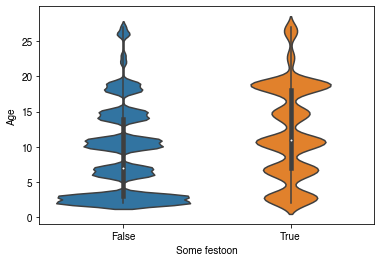

In [137]:
sns.violinplot(y='Age',x='Some festoon',data=dfMinute)

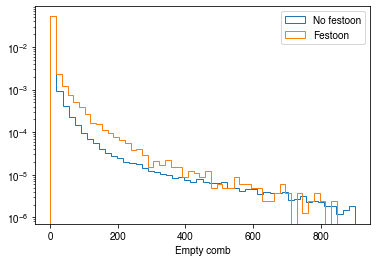

In [190]:
plt.hist(dfMinute[~dfMinute['Some festoon']]['Empty comb'],
         bins=50,histtype='step',label='No festoon',density=True);
plt.hist(dfMinute[dfMinute['Some festoon']]['Empty comb'],
         bins=50,histtype='step',label='Festoon',density=True);
plt.yscale('log')
plt.xlabel('Empty comb')
plt.legend()

Text(0.5, 0, 'Median speed')

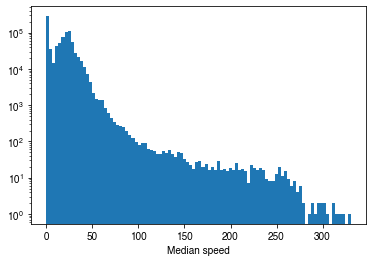

In [147]:
plt.hist(dfMinute['Median speed'],bins=100);
plt.yscale('log')
plt.xlabel('Median speed')

Text(0.5, 0, 'Speed 90th quantile')

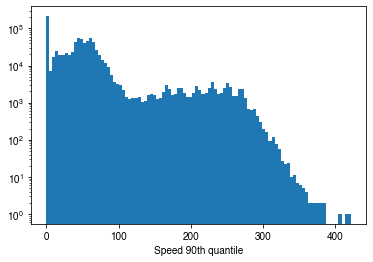

In [148]:
plt.hist(dfMinute['Speed 90th quantile'],bins=100);
plt.yscale('log')
plt.xlabel('Speed 90th quantile')

# predictors of comb-building (in past experience of same bee)

In [192]:
meanPerBee = dfMinute.groupby('Bee unique ID').mean()

In [252]:
meanPerBee['First festoon time'] = firstFestoonTimes

Text(0, 0.5, 'Number of bees')

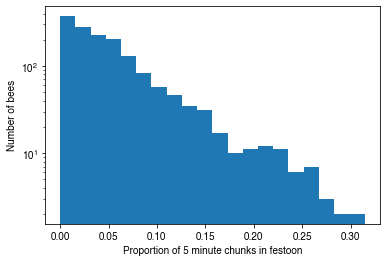

In [200]:
plt.hist(meanPerBee['Some festoon'],bins=20);
plt.yscale('log')
plt.xlabel('Proportion of 5 minute chunks in festoon')
plt.ylabel('Number of bees')

In [214]:
meanPerBee.sort_values('Some festoon')['Some festoon']

Bee unique ID
2239.0    0.000000
2155.0    0.000000
987.0     0.000000
2157.0    0.000000
2062.0    0.000000
            ...   
604.0     0.277778
590.0     0.284722
672.0     0.286458
582.0     0.307292
665.0     0.314236
Name: Some festoon, Length: 1547, dtype: float64

In [238]:
meanPerBee[(meanPerBee['Some festoon'] > 0.10) & (meanPerBee['Some festoon'] < 0.101)]

,Age,Num. observations,Honey,Brood care,Pollen,Dance floor,Other,Frame 0,Frame 1,Frame 2,...,Empty comb,Cohort ID,Dispersion-minute avg.,timedivision,Time (days),Some festoon,Some frame 0,Some frame 3,Stationary,Zero dispersion
Bee unique ID,,,,,,,,,,,,,,,,,,,,,
269.0,26.0,281.739796,0.288461,0.433613,0.077370,0.0,0.200556,0.041442,0.325133,0.160841,...,2.625000,1.0,0.0,143.5,4.498264,0.100694,0.076389,0.100694,0.319444,0.319444
736.0,18.5,313.423168,0.290700,0.485056,0.027297,0.0,0.196947,0.026278,0.213144,0.259991,...,2.814236,3.0,0.0,143.5,4.998264,0.100694,0.059028,0.081597,0.277778,0.265625
891.0,14.5,261.470455,0.336169,0.428941,0.053414,0.0,0.181476,0.063537,0.299185,0.244280,...,5.711806,4.0,0.0,143.5,4.998264,0.100694,0.085069,0.092014,0.239583,0.236111
1197.0,10.5,300.444444,0.242578,0.491272,0.054326,0.0,0.211824,0.068252,0.343282,0.130693,...,5.944444,5.0,0.0,143.5,4.998264,0.100694,0.111111,0.114583,0.180556,0.171875
1233.0,10.5,361.656455,0.397922,0.206939,0.019136,0.0,0.376003,0.023061,0.177906,0.190497,...,8.244792,5.0,0.0,143.5,4.998264,0.100694,0.088542,0.111111,0.288194,0.206597
1515.0,6.5,328.670282,0.292210,0.487271,0.043435,0.0,0.177083,0.075397,0.174894,0.228118,...,4.289931,6.0,0.0,143.5,4.998264,0.100694,0.085069,0.065972,0.256944,0.199653
1667.0,6.5,341.240260,0.179503,0.611654,0.036847,0.0,0.171996,0.011917,0.250133,0.330586,...,11.748264,6.0,0.0,143.5,4.998264,0.100694,0.064236,0.097222,0.232639,0.197917


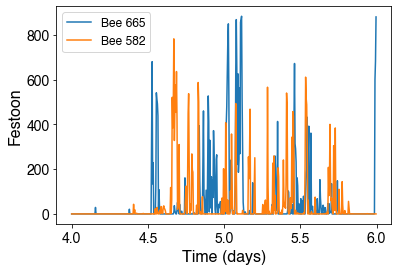

In [53]:
# bees that festoon the most
ax = plt.gca()
for beeID in [665,582]:
    dfMinute[dfMinute['Bee unique ID']==beeID].plot('Time (days)','Festoon',ax=ax,label='Bee {}'.format(beeID))
plt.ylabel('Festoon');

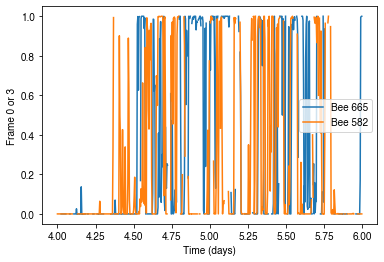

In [285]:
# bees that festoon the most
ax = plt.gca()
for beeID in [665,582]:
    dfMinute[dfMinute['Bee unique ID']==beeID].plot('Time (days)','Frame 0 or 3',ax=ax,label='Bee {}'.format(beeID))
plt.ylabel('Frame 0 or 3');

In [51]:
dfMinute['Top frame not in festoon'] = dfMinute['Some frame 0 or 3'] - dfMinute['Some festoon']

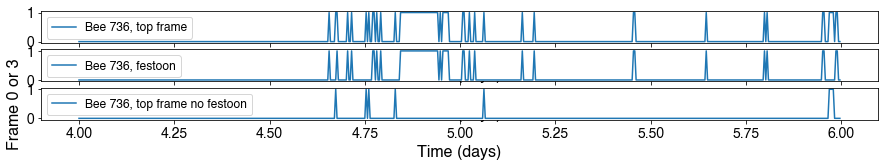

In [55]:
plt.figure(figsize=(15,2))
ax1 = plt.subplot(311)
ax2 = plt.subplot(312)
ax3 = plt.subplot(313)
for beeID in [736,]: # festoon the most = (665,582)
    dfMinute[dfMinute['Bee unique ID']==beeID].plot('Time (days)','Some frame 0 or 3',
                                                    ax=ax1,label='Bee {}, top frame'.format(beeID))
    dfMinute[dfMinute['Bee unique ID']==beeID].plot('Time (days)','Some festoon',
                                                    ax=ax2,label='Bee {}, festoon'.format(beeID))
    dfMinute[dfMinute['Bee unique ID']==beeID].plot('Time (days)','Top frame not in festoon',
                                                    ax=ax3,label='Bee {}, top frame no festoon'.format(beeID))
plt.ylabel('Frame 0 or 3');

Text(0, 0.5, 'Proprtion of bees\nin top frame in festoon')

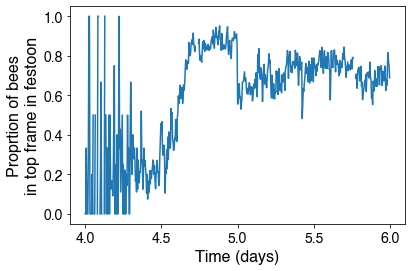

In [59]:
# proportion of bees in top frame that are in festoon
g = dfMinute.groupby('Time (days)').sum()
(g['Some festoon']/g['Some frame 0 or 3']).plot()
plt.ylabel('Proprtion of bees\nin top frame in festoon')

<AxesSubplot:>

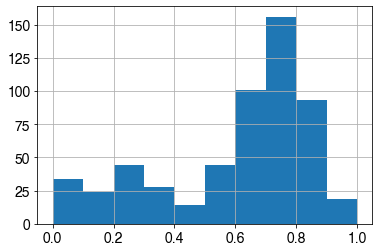

In [68]:
(g['Some festoon']/g['Some frame 0 or 3']).hist()

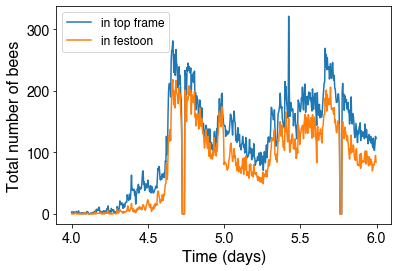

In [88]:
# total number of bees that spend time in the top frame (per 5 minutes on days 4 and 5)
dfMinute.groupby('Time (days)').sum()['Some frame 0 or 3'].plot(label='in top frame')
dfMinute.groupby('Time (days)').sum()['Some festoon'].plot(label='in festoon')
plt.ylabel('Total number of bees')
plt.legend()
#plt.yscale('log')

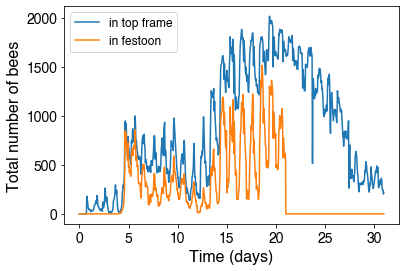

In [89]:
# total number of bees that spend time in the top frame (per hour over 30 days)
dfHour.groupby('Time (days)').sum()['Some frame 0 or 3'].plot(label='in top frame')
dfHour.groupby('Time (days)').sum()['Some festoon'].plot(label='in festoon')
plt.ylabel('Total number of bees')
plt.legend()

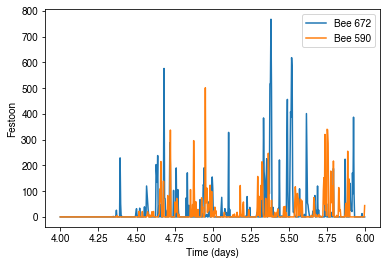

In [220]:
ax = plt.gca()
for beeID in [672,590]:
    dfMinute[dfMinute['Bee unique ID']==beeID].plot('Time (days)','Festoon',ax=ax,label='Bee {}'.format(beeID))
plt.ylabel('Festoon');

Text(0, 0.5, 'Cumulative time spent in festoon')

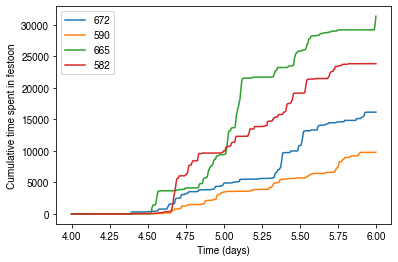

In [256]:
# (dataframes are conveniently ordered by time, so we can do cumulative sums easily)

# largest festooners
for beeID in [672,590,665,582]:
    dfMinuteBee = dfMinute[dfMinute['Bee unique ID']==beeID]
    times = dfMinuteBee['Time (days)']
    cumulativeFestoon = np.cumsum(dfMinuteBee['Festoon'])
    plt.plot(times,cumulativeFestoon,label=beeID)
plt.legend()
plt.xlabel('Time (days)')
plt.ylabel('Cumulative time spent in festoon')

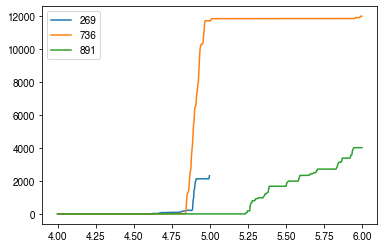

In [257]:
# medium festooners
for beeID in [269,736,891]:
    dfMinuteBee = dfMinute[dfMinute['Bee unique ID']==beeID]
    times = dfMinuteBee['Time (days)']
    cumulativeFestoon = np.cumsum(dfMinuteBee['Festoon'])
    plt.plot(times,cumulativeFestoon,label=beeID)
plt.legend()

In [258]:
meanPerBee.sort_values('First festoon time')['First festoon time']

Bee unique ID
1514.0    4.006944
737.0     4.020833
1110.0    4.024306
1152.0    4.024306
1161.0    4.027778
            ...   
2233.0         NaN
2234.0         NaN
2235.0         NaN
2238.0         NaN
2239.0         NaN
Name: First festoon time, Length: 1547, dtype: float64

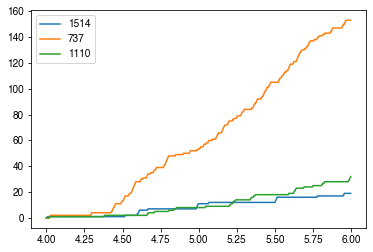

In [270]:
# first festooners
for beeID in [1514,737,1110]:
    dfMinuteBee = dfMinute[dfMinute['Bee unique ID']==beeID]
    times = dfMinuteBee['Time (days)']
    cumulativeFestoon = np.cumsum(dfMinuteBee['Some festoon'])
    plt.plot(times,cumulativeFestoon,label=beeID)
plt.legend()

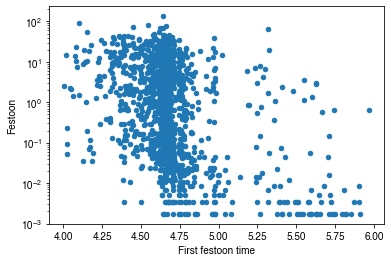

In [261]:
meanPerBee.plot.scatter('First festoon time','Festoon')
plt.yscale('log')

Text(0, 0.5, 'Number of bees')

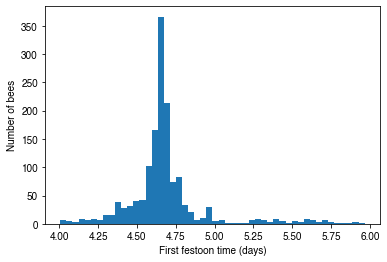

In [269]:
plt.hist(meanPerBee['First festoon time'],bins=50);
plt.xlabel('First festoon time (days)')
plt.ylabel('Number of bees')
#plt.yscale('log')

In [279]:
meanBeeCorr = meanPerBee.corr('spearman')
printLargestCorrs(meanBeeCorr,0.8)

Frame 0, Frame 3 : 0.8665072416583839
Frame 0, Festoon : 0.9171477861981441
Frame 0, Some festoon : 0.8036873791250903
Frame 0, Some frame 0 : 0.8844484482667822
Frame 3, Festoon : 0.9142621682118341
Frame 3, Some festoon : 0.8053973966446055
Frame 3, Some frame 3 : 0.8567476759845168
Median speed, Speed IQR : 0.924255824980169
Median speed, Dispersion (avg) : 0.879883535175069
Speed IQR, Speed 90th quantile : 0.8887871357259727
Speed IQR, Dispersion (avg) : 0.8087431484105837
Day number, Time (days) : 1.0
Festoon, Some festoon : 0.8445573303076462
Festoon, Some frame 0 : 0.837329620755573
Festoon, Some frame 3 : 0.8157062140008876
Some festoon, Some frame 0 : 0.9262687314670734
Some festoon, Some frame 3 : 0.9370600525933779
Some frame 0, Some frame 3 : 0.8603530133650896
Stationary, Zero dispersion : 0.9010170893302166


### Are bees more likely to start being in festoon if they spend more time in frames with others in festoon?

In [11]:
dfMinute['Frame 0 in festoon'] = dfMinute['Frame 0']*dfMinute['Festoon']
dfMinute['Frame 3 in festoon'] = dfMinute['Frame 3']*dfMinute['Festoon']
dfMinute['Frame 0 or 3 in festoon'] = dfMinute['Frame 0 or 3']*dfMinute['Festoon']
dfMinute['Frame 0 some festoon'] = dfMinute['Frame 0']*dfMinute['Some festoon']
dfMinute['Frame 3 some festoon'] = dfMinute['Frame 3']*dfMinute['Some festoon']
dfMinute['Frame 0 or 3 some festoon'] = dfMinute['Frame 0 or 3']*dfMinute['Some festoon']

In [13]:
# compute total number of bees in festoon in frame 0 and 3
dfMinute.set_index('Time (days)',inplace=True)
dfMinute['Total frame 0 in festoon'] = dfMinute.groupby('Time (days)').sum()['Frame 0 in festoon']
dfMinute['Total frame 3 in festoon'] = dfMinute.groupby('Time (days)').sum()['Frame 3 in festoon']
dfMinute['Total frame 0 or 3 in festoon'] = dfMinute.groupby('Time (days)').sum()['Frame 0 or 3 in festoon']
dfMinute['Total frame 0 some festoon'] = dfMinute.groupby('Time (days)').sum()['Frame 0 some festoon']
dfMinute['Total frame 3 some festoon'] = dfMinute.groupby('Time (days)').sum()['Frame 3 some festoon']
dfMinute['Total frame 0 or 3 some festoon'] = dfMinute.groupby('Time (days)').sum()['Frame 0 or 3 some festoon']
dfMinute.reset_index(inplace=True)

# compute number of festooners that are currently in the same frame as each bee
# (CURRENTLY DOES NOT SUBTRACT OFF EACH BEE'S OWN CONTRIBUTION)
#dfMinute['Festooners in same frame'] = dfMinute['Frame 0']*dfMinute['Total frame 0 in festoon'] \
#                                      +dfMinute['Frame 3']*dfMinute['Total frame 3 in festoon'] 

# compute the "cumulative experience" of each bee with festoons
#dfMinute.set_index(['Bee unique ID','Time (days)'],inplace=True)
#dfMinute['Cumulative festoon experience'] = dfMinute.groupby(level=0).cumsum()['Festooners in same frame']
#dfMinute.reset_index(inplace=True)

#dfMinute['Log cumulative festoon experience'] = np.log(dfMinute['Cumulative festoon experience'])
#dfMinute.loc[np.isinf(dfMinute['Log cumulative festoon experience']),'Log cumulative festoon experience'] = np.nan

# subtract off your own contribution
dfMinute['Other frame 0 in festoon'] = dfMinute['Total frame 0 in festoon'] - dfMinute['Frame 0 in festoon']
dfMinute['Other frame 3 in festoon'] = dfMinute['Total frame 3 in festoon'] - dfMinute['Frame 3 in festoon']
dfMinute['Other frame 0 or 3 in festoon'] = \
    dfMinute['Total frame 0 or 3 in festoon'] - dfMinute['Frame 0 or 3 in festoon']
dfMinute['Other frame 0 some festoon'] = dfMinute['Total frame 0 some festoon'] - dfMinute['Frame 0 some festoon']
dfMinute['Other frame 3 some festoon'] = dfMinute['Total frame 3 some festoon'] - dfMinute['Frame 3 some festoon']
dfMinute['Other frame 0 or 3 some festoon'] = \
    dfMinute['Total frame 0 or 3 some festoon'] - dfMinute['Frame 0 or 3 some festoon']

dfMinuteFrame0 = dfMinute[dfMinute['Frame 0']>0.5]
dfMinuteFrame3 = dfMinute[dfMinute['Frame 3']>0.5]
dfMinuteFrame0or3 = dfMinute[dfMinute['Frame 0 or 3']>0.5]

<AxesSubplot:xlabel='Time (days)'>

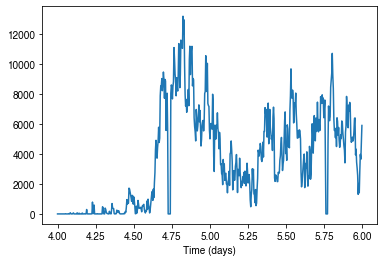

In [365]:
dfMinute.groupby(['Bee unique ID','Time (days)']).mean().loc[7]['Total frame 3 in festoon'].plot()

Text(0, 0.5, 'Number of currently tracked bees \nwho have been in festoon at least once')

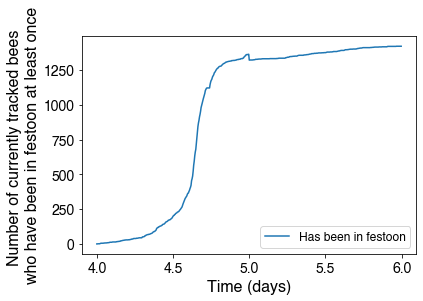

In [561]:
dfMinuteByTime = dfMinute.groupby('Time (days)').sum()
dfMinuteByTime.reset_index().plot('Time (days)','Has been in festoon')
plt.ylabel('Number of currently tracked bees \nwho have been in festoon at least once')

Text(0, 0.5, 'Total number who have been in festoon')

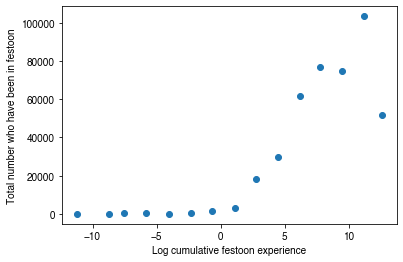

In [429]:
# (not sure if this plot really makes sense)
dfMinuteExperienceMean = dfMinute.groupby(pd.cut(dfMinute['Log cumulative festoon experience'],15)).mean()
dfMinuteExperienceSum = dfMinute.groupby(pd.cut(dfMinute['Log cumulative festoon experience'],15)).sum()
plt.scatter(dfMinuteExperienceMean['Log cumulative festoon experience'],
            dfMinuteExperienceSum['Has been in festoon'])
plt.xlabel('Log cumulative festoon experience')
plt.ylabel('Total number who have been in festoon')

Text(0, 0.5, 'Time (days)')

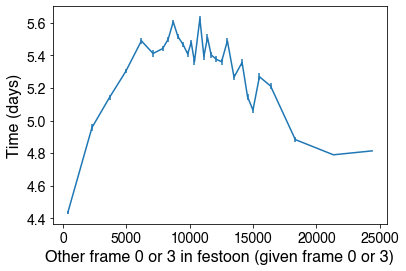

In [168]:
# given you're in Frame 0 or 3, what time is it as a function of 
# how much other festooning is going on

bins = 30 #[0,1,1000,15000]
#dfMinuteBeeFrame0or3 = dfMinuteFrame0or3.groupby('Bee unique ID').
cut = pd.qcut(dfMinuteFrame0or3['Other frame 0 or 3 in festoon'],bins) # cut into quantiles
dfMinuteFrame0or3Binned = dfMinuteFrame0or3.groupby(cut)
plt.errorbar(dfMinuteFrame0or3Binned.mean()['Other frame 0 or 3 in festoon'],
             dfMinuteFrame0or3Binned.mean()['Time (days)'],
             yerr=dfMinuteFrame0or3Binned.std()['Time (days)']/np.sqrt(
                                             dfMinuteFrame0or3Binned.nunique()['Bee unique ID']))

plt.xlabel('Other frame 0 or 3 in festoon (given frame 0 or 3)')
plt.ylabel('Time (days)')

Text(0, 0.5, 'Self frame 0 or 3 in festoon\n(given frame 0 or 3)')

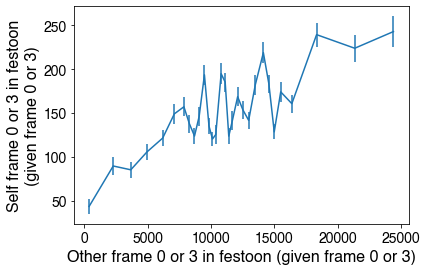

In [169]:
# given you're in Frame 0 or 3, the amount of festooning you do in 5 minutes as a function of 
# how much other festooning is going on

# (something weird about the errorbars --- too small --- trying for standard error of the mean)

bins = 30 #[0,1,1000,15000]
#dfMinuteBeeFrame0or3 = dfMinuteFrame0or3.groupby('Bee unique ID').
cut = pd.qcut(dfMinuteFrame0or3['Other frame 0 or 3 in festoon'],bins) # cut into quantiles
dfMinuteFrame0or3Binned = dfMinuteFrame0or3.groupby(cut)
plt.errorbar(dfMinuteFrame0or3Binned.mean()['Other frame 0 or 3 in festoon'],
             dfMinuteFrame0or3Binned.mean()['Frame 0 or 3 in festoon'],
             yerr=dfMinuteFrame0or3Binned.std()['Frame 0 or 3 in festoon']/np.sqrt(
                                             dfMinuteFrame0or3Binned.nunique()['Bee unique ID']))

plt.xlabel('Other frame 0 or 3 in festoon (given frame 0 or 3)')
plt.ylabel('Self frame 0 or 3 in festoon\n(given frame 0 or 3)')

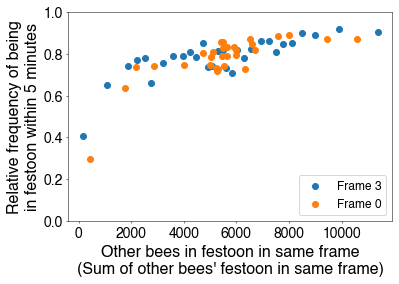

In [602]:
# given you're in Frame 3, the proportion of times you also festoon in 5 minutes as a function of 
# how much other festooning is going on

dfMinuteFrame3 = dfMinute[dfMinute['Frame 3']>0.5]
bins = 30 #[-0.1,400,15000] #10 #[0,1,1000,15000]
#cut = pd.cut(dfMinuteFrame3['Other frame 3 in festoon'],bins) # cut into bins
cut = pd.qcut(dfMinuteFrame3['Other frame 3 in festoon'],bins) # cut into quantiles
dfMinuteFrame3Binned = dfMinuteFrame3.groupby(cut)
yerr = dfMinuteFrame3Binned.std()['Some festoon']/np.sqrt(dfMinuteFrame3Binned.nunique()['Bee unique ID'])
plt.scatter(dfMinuteFrame3Binned.mean()['Other frame 3 in festoon'],
             dfMinuteFrame3Binned.mean()['Some festoon'],
             #yerr=0.*yerr,
             marker='o',
             label='Frame 3'
            )

#plt.xlabel('Other frame 3 in festoon (given frame 3)')
#plt.ylabel('Self some festoon (given frame 3)')
#plt.axis(ymin=0,ymax=1)

# analogously for frame 0...

# given you're in Frame 0, the proportion of times you also festoon in 5 minutes as a function of 
# how much other festooning is going on

dfMinuteFrame0 = dfMinute[dfMinute['Frame 0']>0.5]
bins = 30 #[-0.1,400,15000] #10 #[0,1,1000,15000]
#cut = pd.cut(dfMinuteFrame0['Other frame 0 in festoon'],bins) # cut into bins
cut = pd.qcut(dfMinuteFrame0['Other frame 0 in festoon'],bins) # cut into quantiles
dfMinuteFrame0Binned = dfMinuteFrame0.groupby(cut)
yerr = dfMinuteFrame0Binned.std()['Some festoon']/np.sqrt(dfMinuteFrame0Binned.nunique()['Bee unique ID'])
plt.scatter(dfMinuteFrame0Binned.mean()['Other frame 3 in festoon'],
             dfMinuteFrame0Binned.mean()['Some festoon'],
             #yerr=0.*yerr,
             marker='o',
             label='Frame 0'
            )

#plt.xlabel('Other frame 0 in festoon (given frame 0)')
#plt.ylabel('Self some festoon (given frame 0)')

plt.xlabel("Other bees in festoon in same frame\n(Sum of other bees' festoon in same frame)")
plt.ylabel('Relative frequency of being\nin festoon within 5 minutes')
plt.axis(ymin=0,ymax=1)
plt.legend(loc=4)
plt.subplots_adjust(left=0.2,bottom=0.225,top=0.95,right=0.95)
defaultFigure.makePretty()

plt.savefig('211021_festoon_freq_vs_others_in_festoon_2019_days_4_5.pdf')

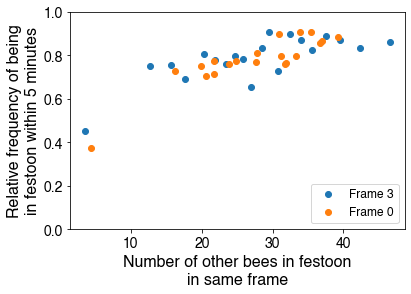

In [584]:
# given you're in Frame 3, the proportion of times you also festoon in 5 minutes as a function of 
# how many others have nonzero festoon

dfMinuteFrame3 = dfMinute[dfMinute['Frame 3']>0.5]
bins = 20 #[-0.1,400,15000] #10 #[0,1,1000,15000]
#cut = pd.cut(dfMinuteFrame3['Other frame 3 some festoon'],bins) # cut into bins
cut = pd.qcut(dfMinuteFrame3['Other frame 3 some festoon'],bins) # cut into quantiles
dfMinuteFrame3Binned = dfMinuteFrame3.groupby(cut)
yerr = dfMinuteFrame3Binned.std()['Some festoon']/np.sqrt(dfMinuteFrame3Binned.nunique()['Bee unique ID'])
plt.scatter(dfMinuteFrame3Binned.mean()['Other frame 3 some festoon'],
             dfMinuteFrame3Binned.mean()['Some festoon'],
             #yerr=0.*yerr,
             marker='o',
             label='Frame 3'
            )

#plt.xlabel('Other frame 3 in festoon (given frame 3)')
#plt.ylabel('Self some festoon (given frame 3)')
#plt.axis(ymin=0,ymax=1)

# analogously for frame 0...

# given you're in Frame 0, the proportion of times you also festoon in 5 minutes as a function of 
# how many others have nonzero festoon

dfMinuteFrame0 = dfMinute[dfMinute['Frame 0']>0.5]
bins = 20 #[-0.1,400,15000] #10 #[0,1,1000,15000]
#cut = pd.cut(dfMinuteFrame0['Other frame 0 some festoon'],bins) # cut into bins
cut = pd.qcut(dfMinuteFrame0['Other frame 0 some festoon'],bins) # cut into quantiles
dfMinuteFrame0Binned = dfMinuteFrame0.groupby(cut)
yerr = dfMinuteFrame0Binned.std()['Some festoon']/np.sqrt(dfMinuteFrame0Binned.nunique()['Bee unique ID'])
plt.scatter(dfMinuteFrame0Binned.mean()['Other frame 3 some festoon'],
             dfMinuteFrame0Binned.mean()['Some festoon'],
             #yerr=0.*yerr,
             marker='o',
             label='Frame 0'
            )

#plt.xlabel('Other frame 0 in festoon (given frame 0)')
#plt.ylabel('Self some festoon (given frame 0)')

plt.xlabel("Number of other bees in festoon\nin same frame")
plt.ylabel('Relative frequency of being\nin festoon within 5 minutes')
plt.axis(ymin=0,ymax=1)
plt.legend(loc=4)

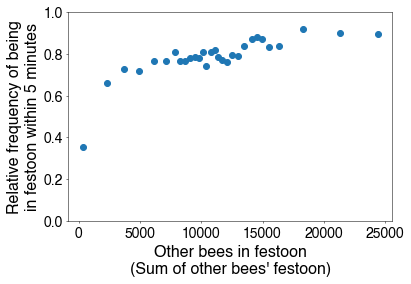

In [17]:
# 2021.11.2 now combining frame 0 and 3 (according to michael, they're just two sides of the same frame)

# given you're in Frame 0 or 3, the proportion of times you also festoon in 5 minutes as a function of 
# how much other festooning is going on

dfMinuteFrame0or3 = dfMinute[dfMinute['Frame 0 or 3']>0.5]
bins = 30 #[-0.1,400,15000] #10 #[0,1,1000,15000]
#cut = pd.cut(dfMinuteFrame0or3['Other frame 0 or 3 in festoon'],bins) # cut into bins
cut = pd.qcut(dfMinuteFrame0or3['Other frame 0 or 3 in festoon'],bins) # cut into quantiles
dfMinuteFrame0or3Binned = dfMinuteFrame0or3.groupby(cut)
yerr = dfMinuteFrame0or3Binned.std()['Some festoon']/np.sqrt(dfMinuteFrame0or3Binned.nunique()['Bee unique ID'])
plt.scatter(dfMinuteFrame0or3Binned.mean()['Other frame 0 or 3 in festoon'],
             dfMinuteFrame0or3Binned.mean()['Some festoon'],
             #yerr=0.*yerr,
             marker='o',
            )

#plt.xlabel('Other frame 3 in festoon (given frame 3)')
#plt.ylabel('Self some festoon (given frame 3)')
#plt.axis(ymin=0,ymax=1)


plt.xlabel("Other bees in festoon\n(Sum of other bees' festoon)")
plt.ylabel('Relative frequency of being\nin festoon within 5 minutes')
plt.axis(ymin=0,ymax=1)
#plt.legend(loc=4)
plt.subplots_adjust(left=0.2,bottom=0.225,top=0.95,right=0.95)
defaultFigure.makePretty()

#plt.savefig('211021_festoon_freq_vs_others_in_festoon_2019_days_4_5.pdf')

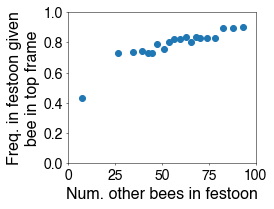

In [244]:
# 2021.11.2 now combining frame 0 and 3 (according to michael, they're just two sides of the same frame)

# given you're in Frame 0 or 3, the proportion of times you also festoon in 5 minutes as a function of 
# how many others have nonzero festoon


plt.figure(figsize=(4,3))
dfMinuteFrame0or3 = dfMinute[dfMinute['Frame 0 or 3']>0.5]
bins = 20 #[-0.1,400,15000] #10 #[0,1,1000,15000]
#cut = pd.cut(dfMinuteFrame0or3['Other frame 0 or 3 some festoon'],bins) # cut into bins
cut = pd.qcut(dfMinuteFrame0or3['Other frame 0 or 3 some festoon'],bins) # cut into quantiles
dfMinuteFrame0or3Binned = dfMinuteFrame0or3.groupby(cut)
yerr = dfMinuteFrame0or3Binned.std()['Some festoon']/np.sqrt(dfMinuteFrame0or3Binned.nunique()['Bee unique ID'])
plt.scatter(dfMinuteFrame0or3Binned.mean()['Other frame 0 or 3 some festoon'],
             dfMinuteFrame0or3Binned.mean()['Some festoon'],
             #yerr=0.*yerr,
             marker='o',
            )

plt.xlabel("Num. other bees in festoon")
plt.ylabel('Freq. in festoon given\nbee in top frame')
plt.axis(xmin=0,xmax=100,ymin=0,ymax=1)
#plt.legend(loc=4)
defaultFigure.makePretty()
plt.subplots_adjust(left=0.25,right=0.9,bottom=0.2,top=0.9)
plt.savefig('211103_festoon_freq_vs_others_in_festoon_2019_days_4_5.pdf')

### Age as predictor?

In [128]:
# group by bees
dfMinuteBees = dfMinute.groupby('Bee unique ID').mean()

<AxesSubplot:>

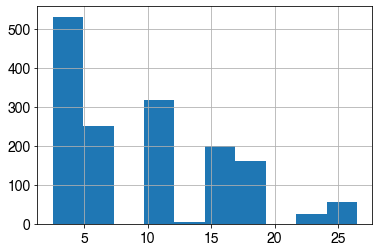

In [126]:
dfMinuteBees['Age'].hist()

/Users/bryandaniels/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 76.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/bryandaniels/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 44.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/bryandaniels/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 42.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/bryandaniels/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 30.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/bryandaniels/anaconda3/lib/python3.8/

(-0.5, 4.5, -6.730295138888889, 80.0)

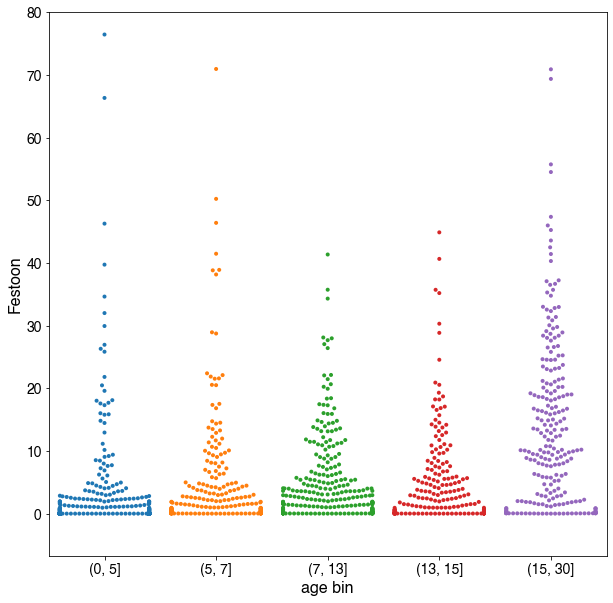

In [214]:
plt.figure(figsize=(10,10))
sns.swarmplot(x='age bin',y='Festoon',data=dfMinuteBees,size=4)
plt.axis(ymax=80)

/Users/bryandaniels/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 13.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='age bin', ylabel='log average festoon'>

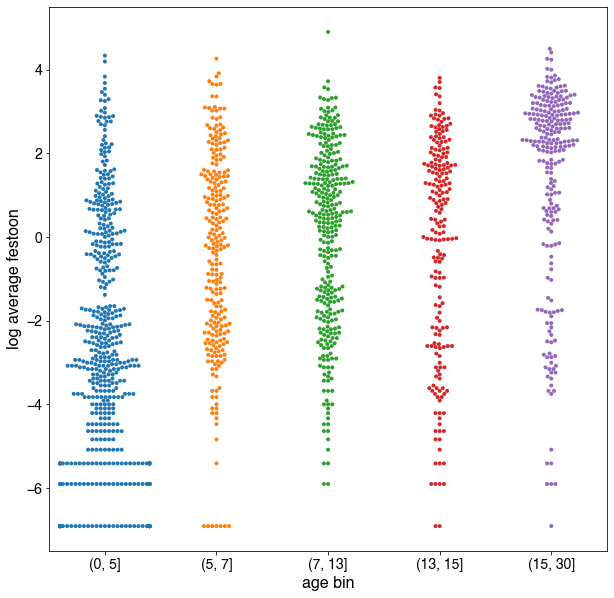

In [210]:
plt.figure(figsize=(10,10))
sns.swarmplot(x='age bin',y='log average festoon',data=dfMinuteBees,size=4)

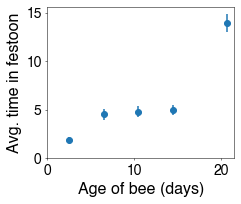

In [250]:
# average time in festoon vs. age

plt.figure(figsize=(4,3))
bins = [0,5,7,13,15,30] #2 #[0,5,10,30]
cut = pd.cut(dfMinuteBees['Age'],bins) # cut into bins
#cut = pd.qcut(dfMinuteBees['Age'],bins) # cut into quantiles
dfMinuteBeesAgeBinned = dfMinuteBees.groupby(cut)
plt.errorbar(dfMinuteBeesAgeBinned.mean()['Age'],
            dfMinuteBeesAgeBinned.mean()['Festoon'],
             yerr=dfMinuteBeesAgeBinned.std()['Festoon']/np.sqrt(dfMinuteBeesAgeBinned.count()['Festoon']),
             marker='o',ls='',
            )
plt.xlabel('Age of bee (days)')
plt.ylabel('Avg. time in festoon')
plt.axis(xmin=0,ymin=0)
plt.subplots_adjust(left=0.25,right=0.9,bottom=0.2,top=0.9)
defaultFigure.makePretty()
plt.savefig('211103_time_in_festoon_vs_age_2019_days_4_5.pdf')

(-0.2, 4.2, 0.0, 547.3)

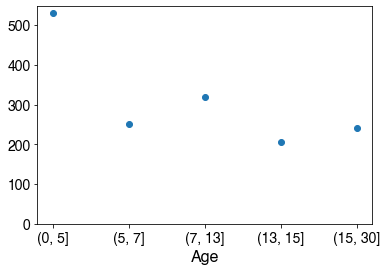

In [191]:
dfMinuteBeesAgeBinned.count()['Festoon'].plot(ls='',marker='o')
plt.axis(ymin=0)

(0.0, 21.560537190082645, 0.0, 11.516225967600388)

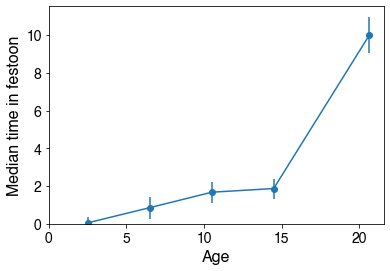

In [177]:
# median time in festoon vs. age

bins = [0,5,7,13,15,30] #2 #[0,5,10,30]
cut = pd.cut(dfMinuteBees['Age'],bins) # cut into bins
#cut = pd.qcut(dfMinuteBees['Age'],bins) # cut into quantiles
dfMinuteBeesAgeBinned = dfMinuteBees.groupby(cut)
plt.errorbar(dfMinuteBeesAgeBinned.mean()['Age'],
            dfMinuteBeesAgeBinned.median()['Festoon'],
             yerr=dfMinuteBeesAgeBinned.std()['Festoon']/np.sqrt(dfMinuteBeesAgeBinned.count()['Festoon']),
             marker='o',
            )
plt.xlabel('Age')
plt.ylabel('Median time in festoon')
plt.axis(xmin=0,ymin=0)

(0.0, 21.560537190082645, 0.0, 0.11527061382748753)

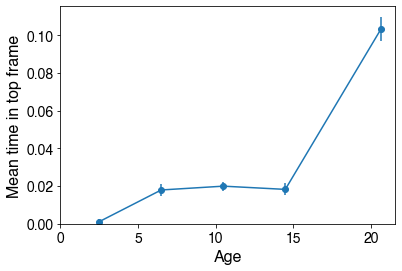

In [215]:
# mean time in top frame vs. age

bins = [0,5,7,13,15,30] #2 #[0,5,10,30]
cut = pd.cut(dfMinuteBees['Age'],bins) # cut into bins
#cut = pd.qcut(dfMinuteBees['Age'],bins) # cut into quantiles
dfMinuteBeesAgeBinned = dfMinuteBees.groupby(cut)
plt.errorbar(dfMinuteBeesAgeBinned.mean()['Age'],
            dfMinuteBeesAgeBinned.median()['Frame 0 or 3'],
             yerr=dfMinuteBeesAgeBinned.std()['Frame 0 or 3']/np.sqrt(dfMinuteBeesAgeBinned.count()['Festoon']),
             marker='o',
            )
plt.xlabel('Age')
plt.ylabel('Mean time in top frame')
plt.axis(xmin=0,ymin=0)